![image CNN](https://www.python-course.eu/images/mnist_image.png)

MNIST software download dataset from 
https://www.python-course.eu/neural_network_mnist.php

In [3]:
import sys

from tensorflow.examples.tutorials.mnist import input_data

import tensorflow as tf


In [4]:
#matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
image_size = 28 # width and length
no_of_different_labels = 10 #  i.e. 0, 1, 2, 3, ..., 9
image_pixels = image_size * image_size
data_path = ""
train_data = np.loadtxt(data_path + "mnist_train.csv", 
                        delimiter=",")
test_data = np.loadtxt(data_path + "mnist_test.csv", 
                       delimiter=",") 

In [5]:
fac = 255  *0.99 + 0.01
train_imgs = np.asfarray(train_data[:, 1:]) / fac
test_imgs = np.asfarray(test_data[:, 1:]) / fac
train_labels = np.asfarray(train_data[:, :1])
test_labels = np.asfarray(test_data[:, :1])

In [137]:
print(train_labels[6])

[ 1.]


In [6]:
## demo ouput

In [7]:
import numpy as np
lr = np.arange(10)
for label in range(10):
    one_hot = (lr==label).astype(np.int)
    print("label: ", label, " in one-hot representation: ", one_hot)

label:  0  in one-hot representation:  [1 0 0 0 0 0 0 0 0 0]
label:  1  in one-hot representation:  [0 1 0 0 0 0 0 0 0 0]
label:  2  in one-hot representation:  [0 0 1 0 0 0 0 0 0 0]
label:  3  in one-hot representation:  [0 0 0 1 0 0 0 0 0 0]
label:  4  in one-hot representation:  [0 0 0 0 1 0 0 0 0 0]
label:  5  in one-hot representation:  [0 0 0 0 0 1 0 0 0 0]
label:  6  in one-hot representation:  [0 0 0 0 0 0 1 0 0 0]
label:  7  in one-hot representation:  [0 0 0 0 0 0 0 1 0 0]
label:  8  in one-hot representation:  [0 0 0 0 0 0 0 0 1 0]
label:  9  in one-hot representation:  [0 0 0 0 0 0 0 0 0 1]


In [8]:
lr = np.arange(no_of_different_labels)
# transform labels into one hot representation
train_labels_one_hot = (lr==train_labels).astype(np.float)
test_labels_one_hot = (lr==test_labels).astype(np.float)
# we don't want zeroes and ones in the labels neither:
train_labels_one_hot[train_labels_one_hot==0] = 0.01
train_labels_one_hot[train_labels_one_hot==1] = 0.99
test_labels_one_hot[test_labels_one_hot==0] = 0.01
test_labels_one_hot[test_labels_one_hot==1] = 0.99

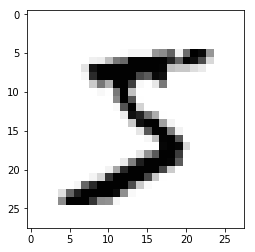

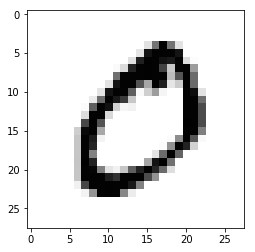

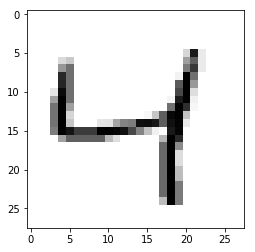

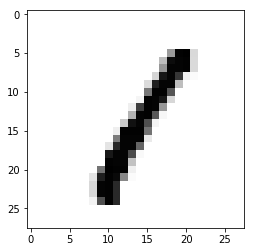

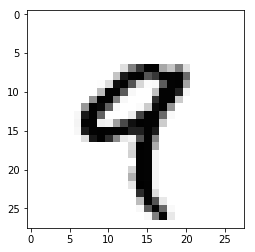

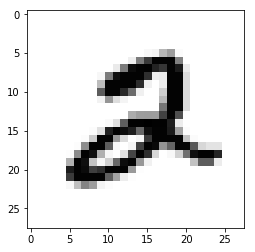

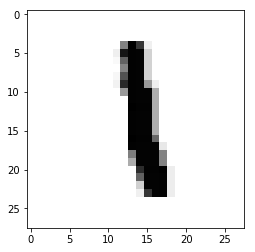

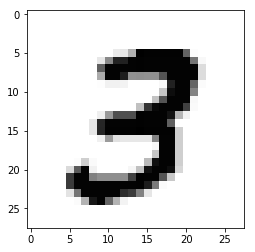

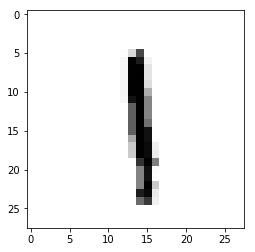

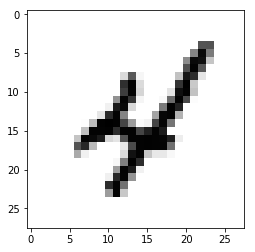

In [9]:
%matplotlib inline
for i in range(10):
    img = train_imgs[i].reshape((28,28))
    plt.imshow(img, cmap="Greys")
    plt.show()

In [10]:
#classifier
import numpy as np
@np.vectorize
def sigmoid(x):
    return 1 / (1 + np.e ** -x)
activation_function = sigmoid
from scipy.stats import truncnorm
def truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm((low - mean) / sd, 
                     (upp - mean) / sd, 
                     loc=mean, 
                     scale=sd)
class NeuralNetwork:
    
    def __init__(self, 
                 no_of_in_nodes, 
                 no_of_out_nodes, 
                 no_of_hidden_nodes,
                 learning_rate):
        self.no_of_in_nodes = no_of_in_nodes
        self.no_of_out_nodes = no_of_out_nodes
        self.no_of_hidden_nodes = no_of_hidden_nodes
        self.learning_rate = learning_rate 
        self.create_weight_matrices()
        
    def create_weight_matrices(self):
        """ 
        A method to initialize the weight 
        matrices of the neural network
        """
        rad = 1 / np.sqrt(self.no_of_in_nodes)
        X = truncated_normal(mean=0, 
                             sd=1, 
                             low=-rad, 
                             upp=rad)
        self.wih = X.rvs((self.no_of_hidden_nodes, 
                                       self.no_of_in_nodes))
        rad = 1 / np.sqrt(self.no_of_hidden_nodes)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        self.who = X.rvs((self.no_of_out_nodes, 
                                         self.no_of_hidden_nodes))
        
    
    def train(self, input_vector, target_vector):
        """
        input_vector and target_vector can 
        be tuple, list or ndarray
        """
        
        input_vector = np.array(input_vector, ndmin=2).T
        target_vector = np.array(target_vector, ndmin=2).T
        
        output_vector1 = np.dot(self.wih, 
                                input_vector)
        output_hidden = activation_function(output_vector1)
        
        output_vector2 = np.dot(self.who, 
                                output_hidden)
        output_network = activation_function(output_vector2)
        
        output_errors = target_vector - output_network
        # update the weights:
        tmp = output_errors * output_network \
              * (1.0 - output_network)     
        tmp = self.learning_rate  * np.dot(tmp, 
                                           output_hidden.T)
        self.who += tmp
        # calculate hidden errors:
        hidden_errors = np.dot(self.who.T, 
                               output_errors)
        # update the weights:
        tmp = hidden_errors * output_hidden * \
              (1.0 - output_hidden)
        self.wih += self.learning_rate \
                          * np.dot(tmp, input_vector.T)
        
        
    
    def run(self, input_vector):
        # input_vector can be tuple, list or ndarray
        input_vector = np.array(input_vector, ndmin=2).T
        output_vector = np.dot(self.wih, 
                               input_vector)
        output_vector = activation_function(output_vector)
        
        output_vector = np.dot(self.who, 
                               output_vector)
        output_vector = activation_function(output_vector)
    
        return output_vector
            
    def confusion_matrix(self, data_array, labels):
        cm = np.zeros((10, 10), int)
        for i in range(len(data_array)):
            res = self.run(data_array[i])
            res_max = res.argmax()
            target = labels[i][0]
            cm[res_max, int(target)] += 1
        return cm    
    def precision(self, label, confusion_matrix):
        col = confusion_matrix[:, label]
        return confusion_matrix[label, label] / col.sum()
    
    def recall(self, label, confusion_matrix):
        row = confusion_matrix[label, :]
        return confusion_matrix[label, label] / row.sum()
        
    
    def evaluate(self, data, labels):
        corrects, wrongs = 0, 0
        for i in range(len(data)):
            res = self.run(data[i])
            res_max = res.argmax()
            if res_max == labels[i]:
                corrects += 1
            else:
                wrongs += 1
        return corrects, wrongs
            

In [11]:
ANN = NeuralNetwork(no_of_in_nodes = image_pixels, 
                    no_of_out_nodes = 10, 
                    no_of_hidden_nodes = 100,
                    learning_rate = 0.1)
    
    
for i in range(len(train_imgs)):
    ANN.train(train_imgs[i], train_labels_one_hot[i])

In [12]:
for i in range(20):
    res = ANN.run(test_imgs[i])
    print(test_labels[i], np.argmax(res), np.max(res))
    

[ 7.] 7 0.99407503111
[ 2.] 2 0.723752893495
[ 1.] 1 0.98779130496
[ 0.] 0 0.961095200666
[ 4.] 4 0.98203175922
[ 1.] 1 0.987518513952
[ 4.] 4 0.965306470173
[ 9.] 9 0.973879480244
[ 5.] 6 0.378633178998
[ 9.] 9 0.987896837984
[ 0.] 0 0.967272005536
[ 6.] 6 0.867606267561
[ 9.] 9 0.991612224905
[ 0.] 0 0.993556578981
[ 1.] 1 0.979730112799
[ 5.] 5 0.921473574898
[ 9.] 9 0.990912484917
[ 7.] 7 0.990486658095
[ 3.] 3 0.852360889731
[ 4.] 4 0.995984591995


In [13]:
corrects, wrongs = ANN.evaluate(train_imgs, train_labels)
print("accruracy train: ", corrects / ( corrects + wrongs))
corrects, wrongs = ANN.evaluate(test_imgs, test_labels)
print("accruracy: test", corrects / ( corrects + wrongs))
cm = ANN.confusion_matrix(train_imgs, train_labels)
print(cm)
for i in range(10):
    print("digit: ", i, "precision: ", ANN.precision(i, cm), "recall: ", ANN.recall(i, cm))

accruracy train:  0.9463166666666667
accruracy: test 0.9466
[[5785    1   37   20   12   50   38   12   15   19]
 [   2 6613   54   17   10   29   20   55   94    5]
 [   4   20 5468   42   15   11    3   34   10    6]
 [   2   29  106 5809    1  132    3   32  104   65]
 [   6   13   50    6 5458   41    8   31   27   59]
 [   4    5    6   56    0 4889   16    1    9    5]
 [  35    2   42   13   51   73 5789    5   35    2]
 [   0    8   49   42    9   10    1 5831    5   36]
 [  51   21  117   59    5   69   40   14 5405   20]
 [  34   30   29   67  281  117    0  250  147 5732]]
digit:  0 precision:  0.976700996117 recall:  0.965937552179
digit:  1 precision:  0.980866211807 recall:  0.958544716626
digit:  2 precision:  0.917757636791 recall:  0.974167112061
digit:  3 precision:  0.947480019573 recall:  0.924558332007
digit:  4 precision:  0.934269085929 recall:  0.957711879277
digit:  5 precision:  0.901863124885 recall:  0.979563213785
digit:  6 precision:  0.978202095302 recall

In [14]:
print(ANN.no_of_in_nodes) # 28x28
print (ANN.no_of_hidden_nodes) # sigmoid
print (ANN.no_of_out_nodes) #softmax 10 class

784
100
10


In [15]:
weight = []
weight.append(ANN.wih)
weight.append(ANN.who)
#print (len(weight[0]))
np.save("w_ANN.npy",weight)

In [43]:
print(ANN.wih)

[[ 0.00560031  0.00835588  0.03226412 ..., -0.03547185  0.01867613
  -0.0310989 ]
 [-0.02295917 -0.00885628 -0.02778888 ...,  0.01552454 -0.00957268
  -0.0321696 ]
 [ 0.02225215 -0.00938817 -0.0283589  ...,  0.02076187  0.01974936
   0.00661273]
 ..., 
 [ 0.01230222 -0.02164185  0.00805057 ...,  0.00883964  0.02395572
   0.0123062 ]
 [-0.00180909  0.03380885 -0.00290926 ..., -0.01151186 -0.01005203
   0.0104391 ]
 [ 0.02568958  0.00079562  0.01346853 ..., -0.03396522  0.02108658
   0.00055256]]


In [62]:
np.savetxt("wih_ANN.csv", ANN.wih, delimiter=",")
np.savetxt("who_ANN.csv", ANN.who, delimiter=",")

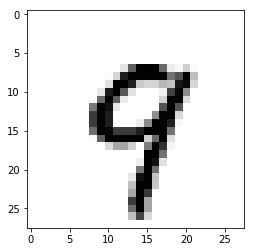

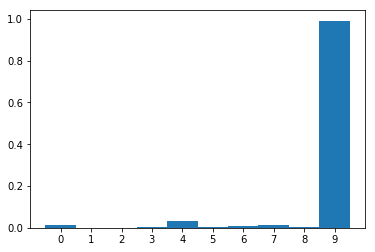

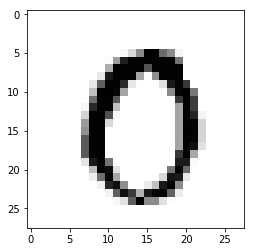

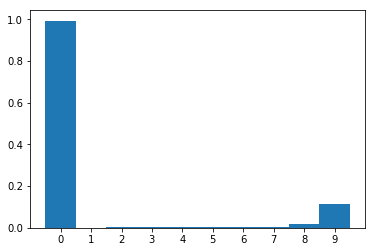

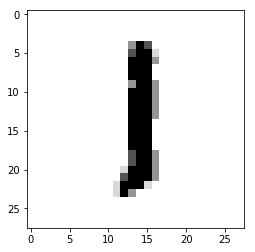

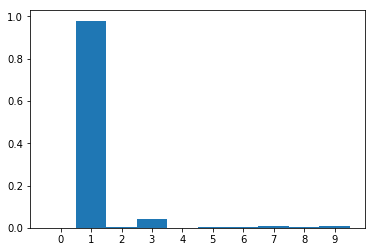

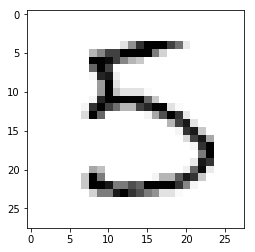

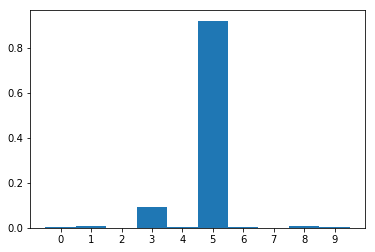

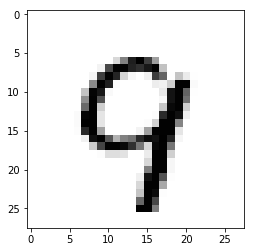

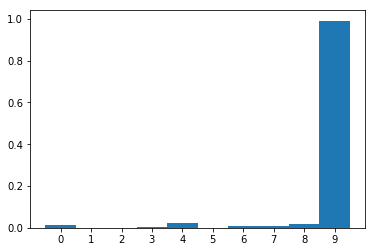

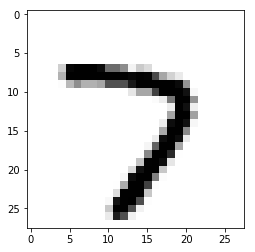

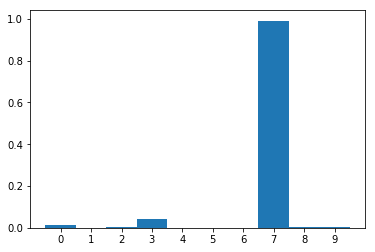

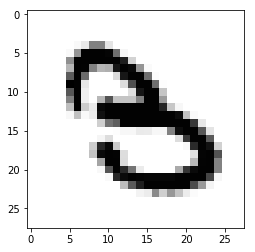

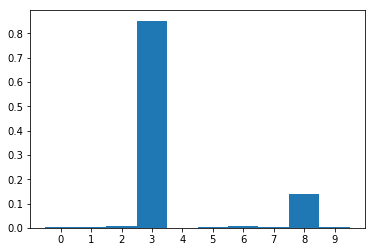

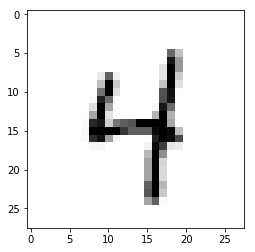

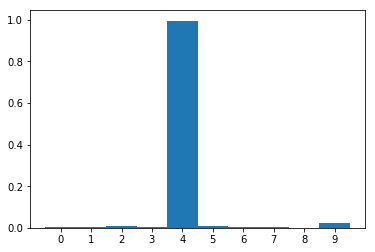

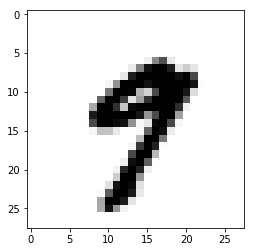

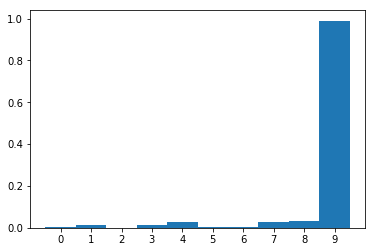

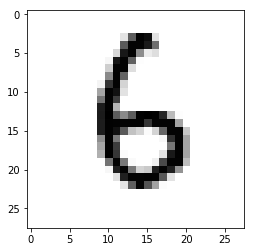

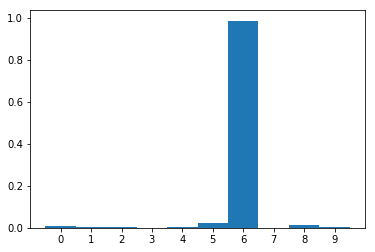

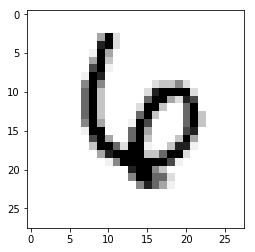

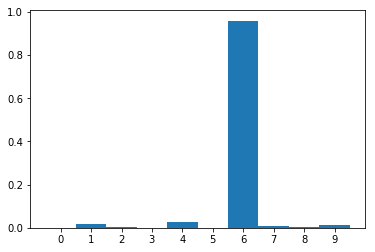

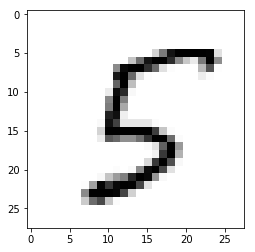

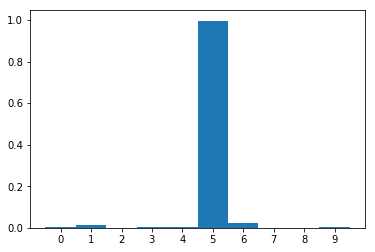

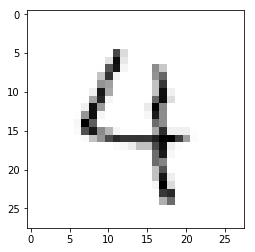

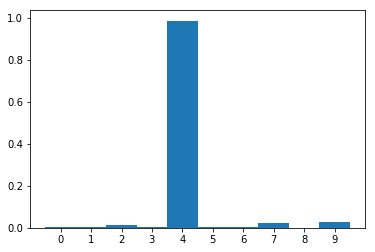

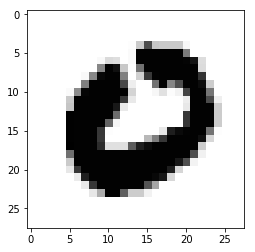

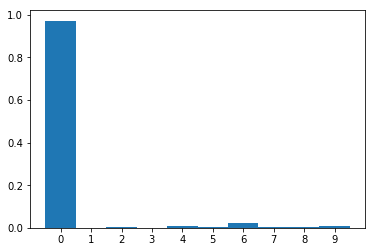

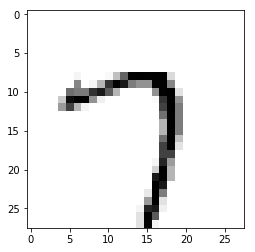

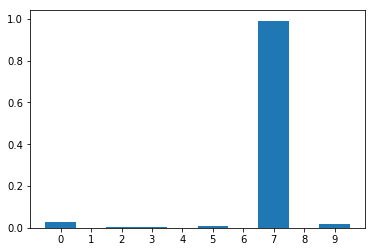

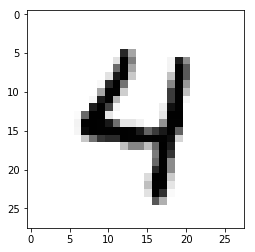

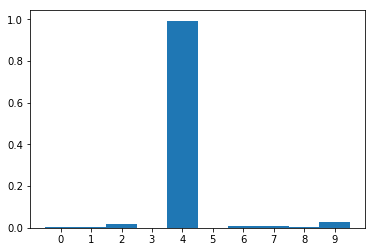

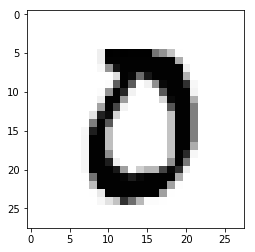

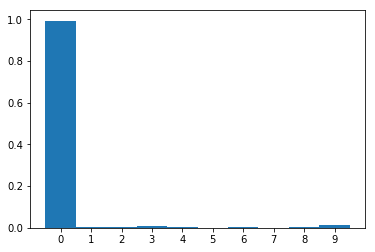

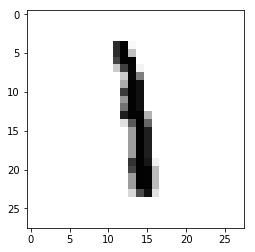

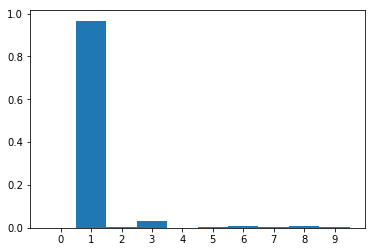

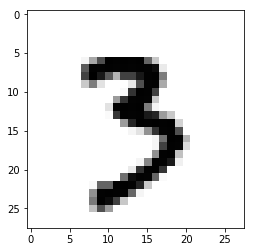

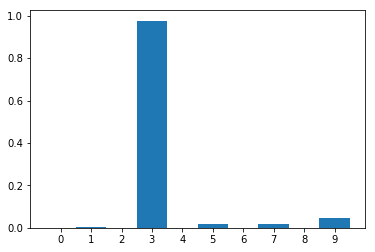

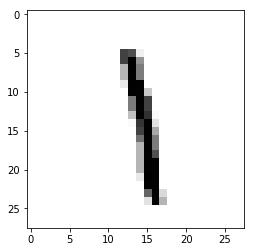

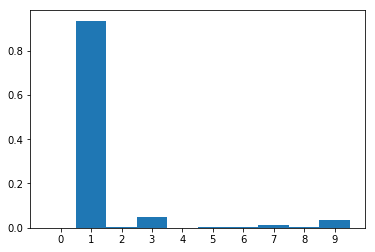

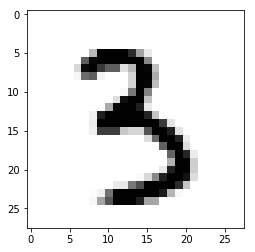

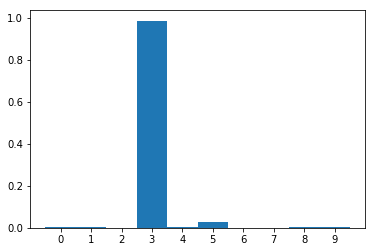

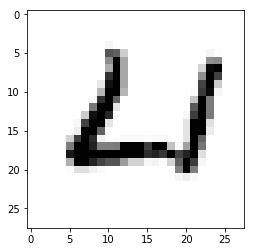

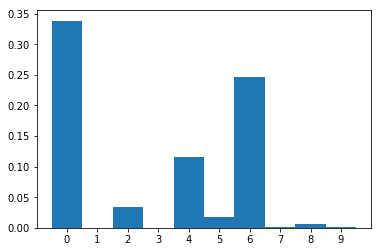

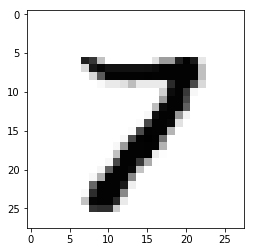

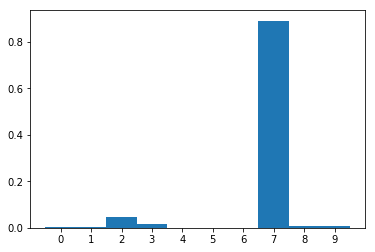

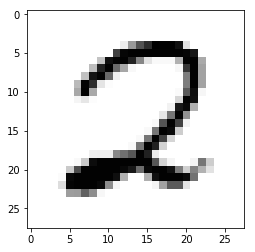

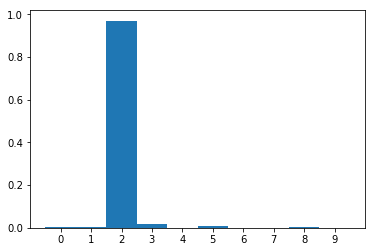

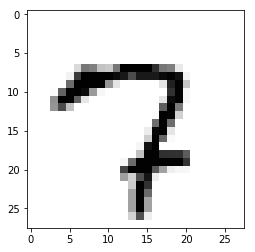

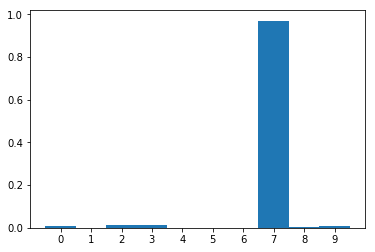

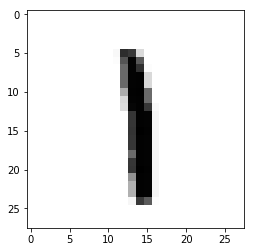

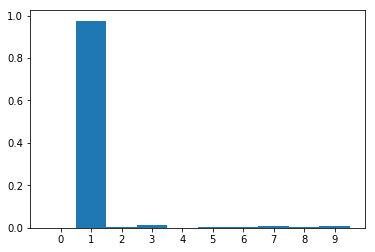

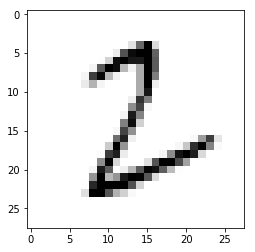

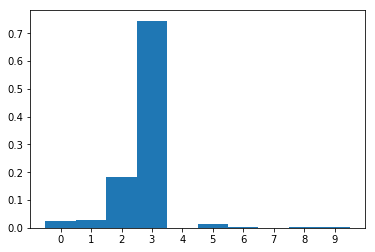

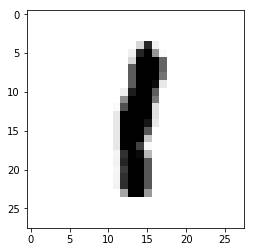

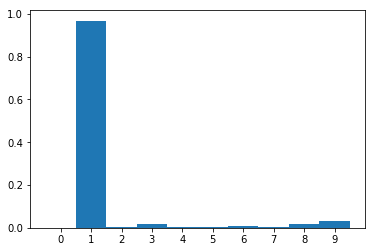

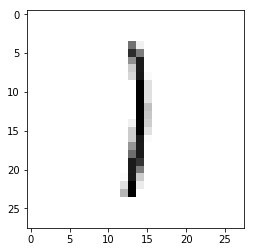

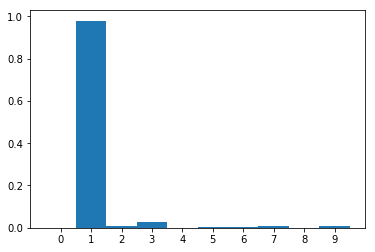

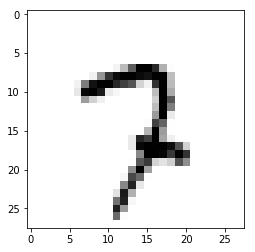

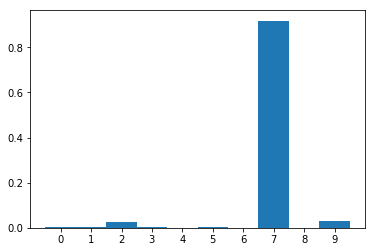

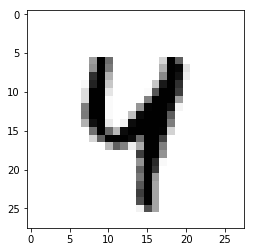

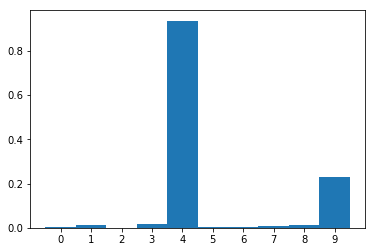

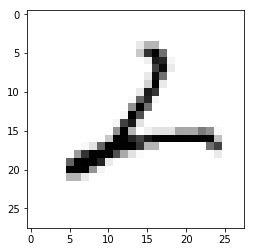

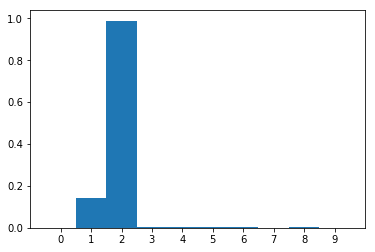

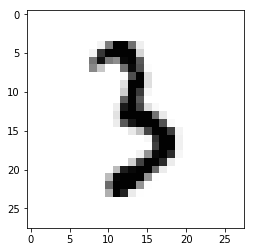

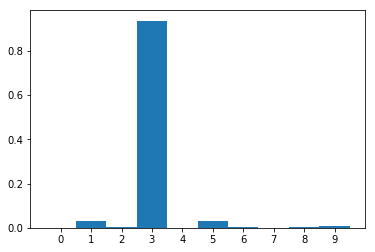

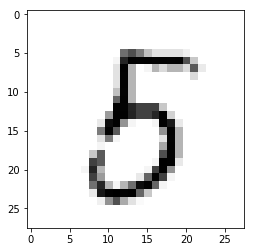

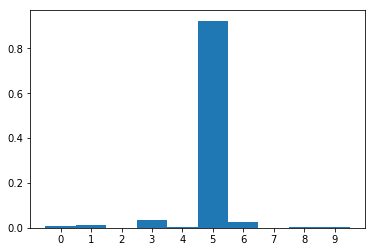

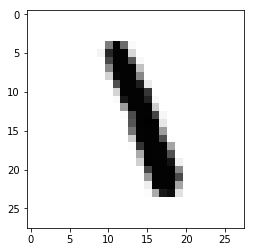

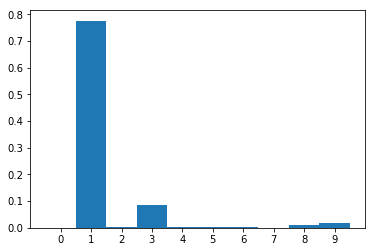

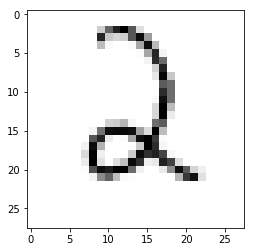

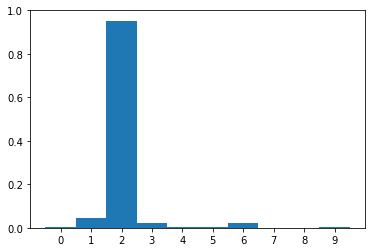

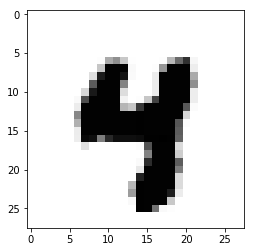

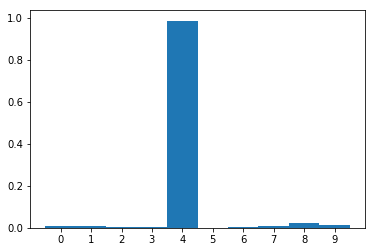

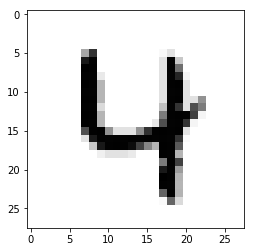

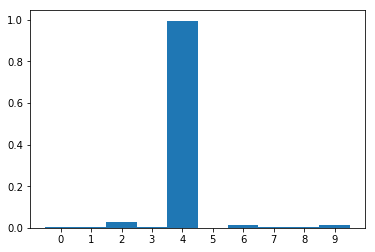

In [133]:
index = np.arange(10)
for i,im in enumerate(test_imgs[12:50]):
    res = ANN.run(im)
    #print (res)
    img = im.reshape((28,28))
    plt.imshow(img, cmap="Greys")
    #for y in range(10):
     #   print (y, *res[y])
    #bar = res.tolist()
    plt.show()
    plt.bar(index,res,1)
    plt.xticks(index,index)
    plt.show()

In [39]:
plt.bar?